In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import *

In [3]:
import os
cwd = os.getcwd()
os.chdir(os.path.join(cwd,'..\..\..'))

In [4]:
import ExMAS.main
import ExMAS.utils
import seaborn as sns

In [28]:
df_0= pd.read_csv('ExMAS/data/big_test_stat.csv', header=[0,1])

df_0.fillna(value=0)
df_0['2000']

,price,replication,mean_lambda_r,vehhour,vehhour_ns,passhour,passhour_ns,passUtil,passUtil_ns,shared_ratio
0,0.15,0,0.197282,882719,938959,955041,938959,14489.602200,14564.6405,0.1920
1,0.15,1,0.197629,910486,971569,989166,971569,14998.200225,15069.9620,0.1940
2,0.15,2,0.184744,909728,963598,979529,963598,14868.951075,14946.1880,0.1990
3,0.15,3,0.189948,905973,965155,982800,965155,14893.267225,14970.4580,0.2000
4,0.15,4,0.196656,892855,948181,964146,948181,14632.637150,14707.3190,0.1860
5,0.20,0,0.245490,824624,977839,1038402,977839,14856.618300,15167.1080,0.4360
6,0.20,1,0.231642,814683,952326,1006285,952326,14474.563750,14771.4855,0.4290
7,0.20,2,0.233377,832274,968871,1023125,968871,14745.249875,15028.0725,0.4105
8,0.20,3,0.224300,818742,950786,1006584,950786,14461.213200,14747.4865,0.4240
9,0.20,4,0.238153,818370,959632,1014757,959632,14574.289400,14884.8935,0.4090


In [9]:
df_0.sample(4)

200                                                                    \
   price replication mean_lambda_r vehhour vehhour_ns passhour passhour_ns   
12  0.25           2      0.178115   89668      95459    99861       95459   
18  0.30           3      0.176066   92246     102995   112168      102995   
21  0.35           1      0.191353   86069      95112   104070       95112   
4   0.15           4      0.226674   93432      94784    95131       94784   

                                          ...  3000                            \
       passUtil passUtil_ns shared_ratio  ... price replication mean_lambda_r   
12  1456.780525   1480.5595        0.205  ...  0.25         2.0      0.306711   
18  1534.811475   1597.4605        0.390  ...  0.30         3.0      0.347826   
21  1421.382900   1475.2920        0.365  ...   NaN         NaN           NaN   
4   1468.964900   1470.2035        0.030  ...  0.15         4.0      0.205301   

                                                                           \
      vehhour vehhour_ns   passhour passhour_ns      passUtil passUtil_ns   
12  1081710.0  1433063.0  1592952.0   1433063.0  21408.181975  22227.9910   
18   997620.0  1414967.0  1644601.0   1414967.0  20849.482150  21947.7970   
21        NaN        NaN        NaN         NaN           NaN         NaN   
4   1319087.0  1427390.0  1456960.0   1427390.0  21997.811075  22140.3655   

                 
   shared_ratio  
12        0.603  
18        0.669  
21          NaN  
4         0.232  

[4 rows x 110 columns]

In [10]:
df_015 = df_0[df_0['200','price']==0.15]
df_02 = df_0[df_0['200','price']==0.2]
df_025 = df_0[df_0['200','price']==0.25]
df_03 = df_0[df_0['200','price']==0.3]
df_035 = df_0[df_0['200','price']==0.35]

In [11]:
df_015= df_015.stack(level=0).reset_index(level=0, drop=True).reset_index()
df_02= df_02.stack(level=0).reset_index(level=0, drop=True).reset_index()
df_025= df_025.stack(level=0).reset_index(level=0, drop=True).reset_index()
df_03= df_03.stack(level=0).reset_index(level=0, drop=True).reset_index()
df_035= df_035.stack(level=0).reset_index(level=0, drop=True).reset_index()

In [29]:
df_015

,index,mean_lambda_r,passUtil,passUtil_ns,passhour,passhour_ns,price,replication,shared_ratio,vehhour,vehhour_ns,vehhour_scaled
48,200,0.226674,1468.964900,1470.2035,95131.0,94784.0,0.15,4.0,0.030000,93432.0,94784.0,0.985736
4,200,0.129093,1473.755825,1474.6040,95651.0,95068.0,0.15,0.0,0.040000,94259.0,95068.0,0.991490
26,200,0.283885,1421.954175,1423.0275,92096.0,91740.0,0.15,2.0,0.030000,90298.0,91740.0,0.984282
37,200,0.167316,1349.301025,1350.0270,87415.0,87030.0,0.15,3.0,0.020000,86313.0,87030.0,0.991761
15,200,0.158091,1472.779875,1473.5485,95145.0,95000.0,0.15,1.0,0.030000,94531.0,95000.0,0.995063
52,400,0.174802,3006.527900,3012.6280,195517.0,194228.0,0.15,4.0,0.065000,190477.0,194228.0,0.980688
19,400,0.148349,2879.370450,2884.5695,187068.0,185962.0,0.15,1.0,0.060000,182934.0,185962.0,0.983717
41,400,0.117941,2888.804450,2894.2110,187757.0,186582.0,0.15,3.0,0.060000,184228.0,186582.0,0.987384
8,400,0.104363,2964.878000,2968.6875,192797.0,191388.0,0.15,0.0,0.060000,189189.0,191388.0,0.988510
30,400,0.155534,2929.230550,2936.0850,190479.0,189291.0,0.15,2.0,0.075000,185599.0,189291.0,0.980496


In [15]:
df_015['index']=df_015['index'].astype(int)
df_015=df_015.sort_values(by='index')
df_015['vehhour_scaled'] = df_015['vehhour']/df_015['vehhour_ns']


df_02['index']=df_02['index'].astype(int)
df_02=df_02.sort_values(by='index')
df_02['vehhour_scaled'] = df_02['vehhour']/df_015['vehhour_ns']

df_025['index']=df_025['index'].astype(int)
df_025=df_025.sort_values(by='index')
df_025['vehhour_scaled'] = df_025['vehhour']/df_015['vehhour_ns']

df_03['index']=df_03['index'].astype(int)
df_03=df_03.sort_values(by='index')
df_03['vehhour_scaled'] = df_03['vehhour']/df_015['vehhour_ns']

df_035['index']=df_035['index'].astype(int)
df_035=df_035.sort_values(by='index')
df_035['vehhour_scaled'] = df_035['vehhour']/df_015['vehhour_ns']

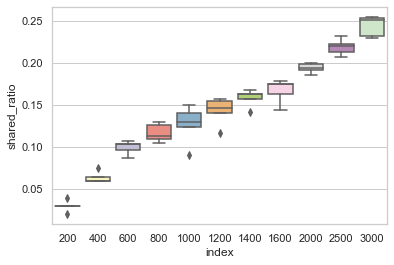

In [26]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x='index', y='shared_ratio',

                 data=df_015, palette="Set3")

In [10]:
prices = [df_015, df_02,df_025,df_03,df_035]

for i,k in enumerate(prices):
    print(i)
    #print(k)

0
1
2
3
4


In [11]:
divmod(5,2)

(2, 1)

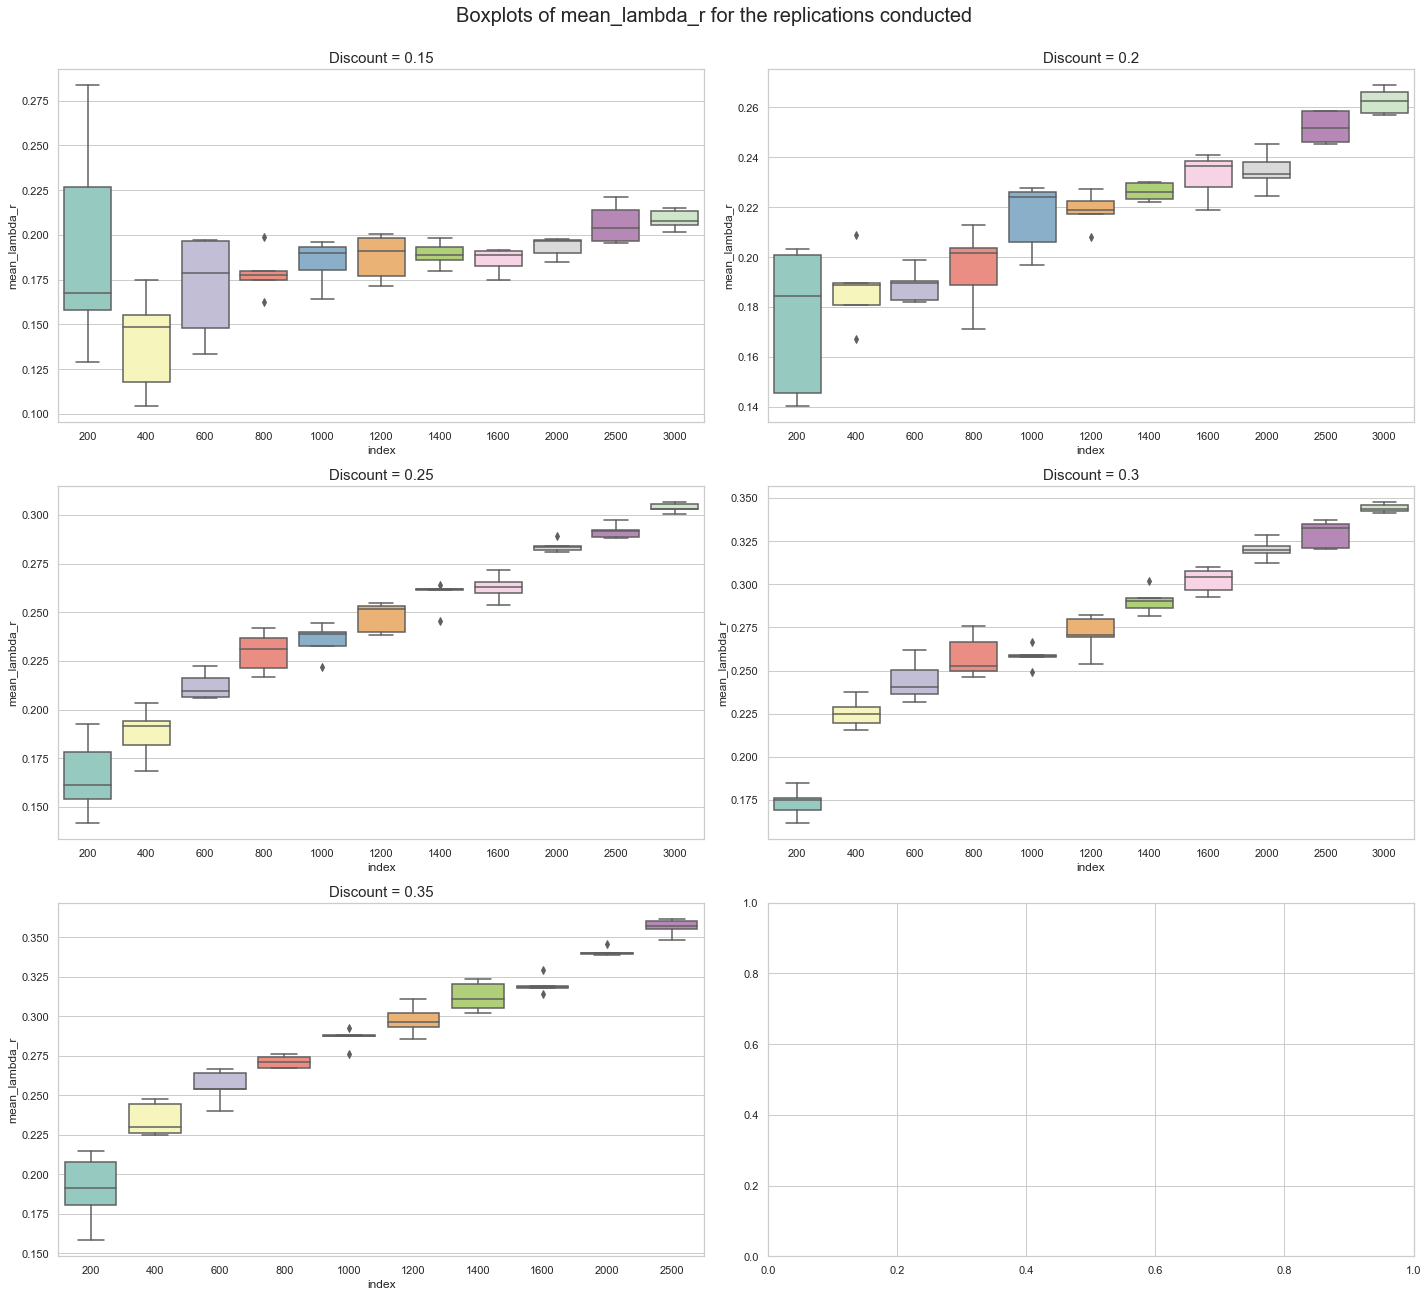

In [15]:
prices = [df_015, df_02,df_025,df_03,df_035]
price  = [0.15,0.2,0.25,0.3,0.35]

fig, axes = plt.subplots(3, 2, figsize = (20,18 ))
l=0
for i,k in enumerate(prices):
    l, j = divmod(i, 2)
    
    sns.boxplot(x='index', y='mean_lambda_r',data=k, palette="Set3",orient='v',ax=axes[l,j])\
    .set_title('Discount = {}'.format(price[i]),fontsize=15)
    ax.set_axis_off();
label = str('Boxplots of mean_lambda_r for the replications conducted')
fig.suptitle(label,y=1,fontsize=20)
fig.subplots_adjust(top=0.88)
plt.tight_layout()
plt.show()

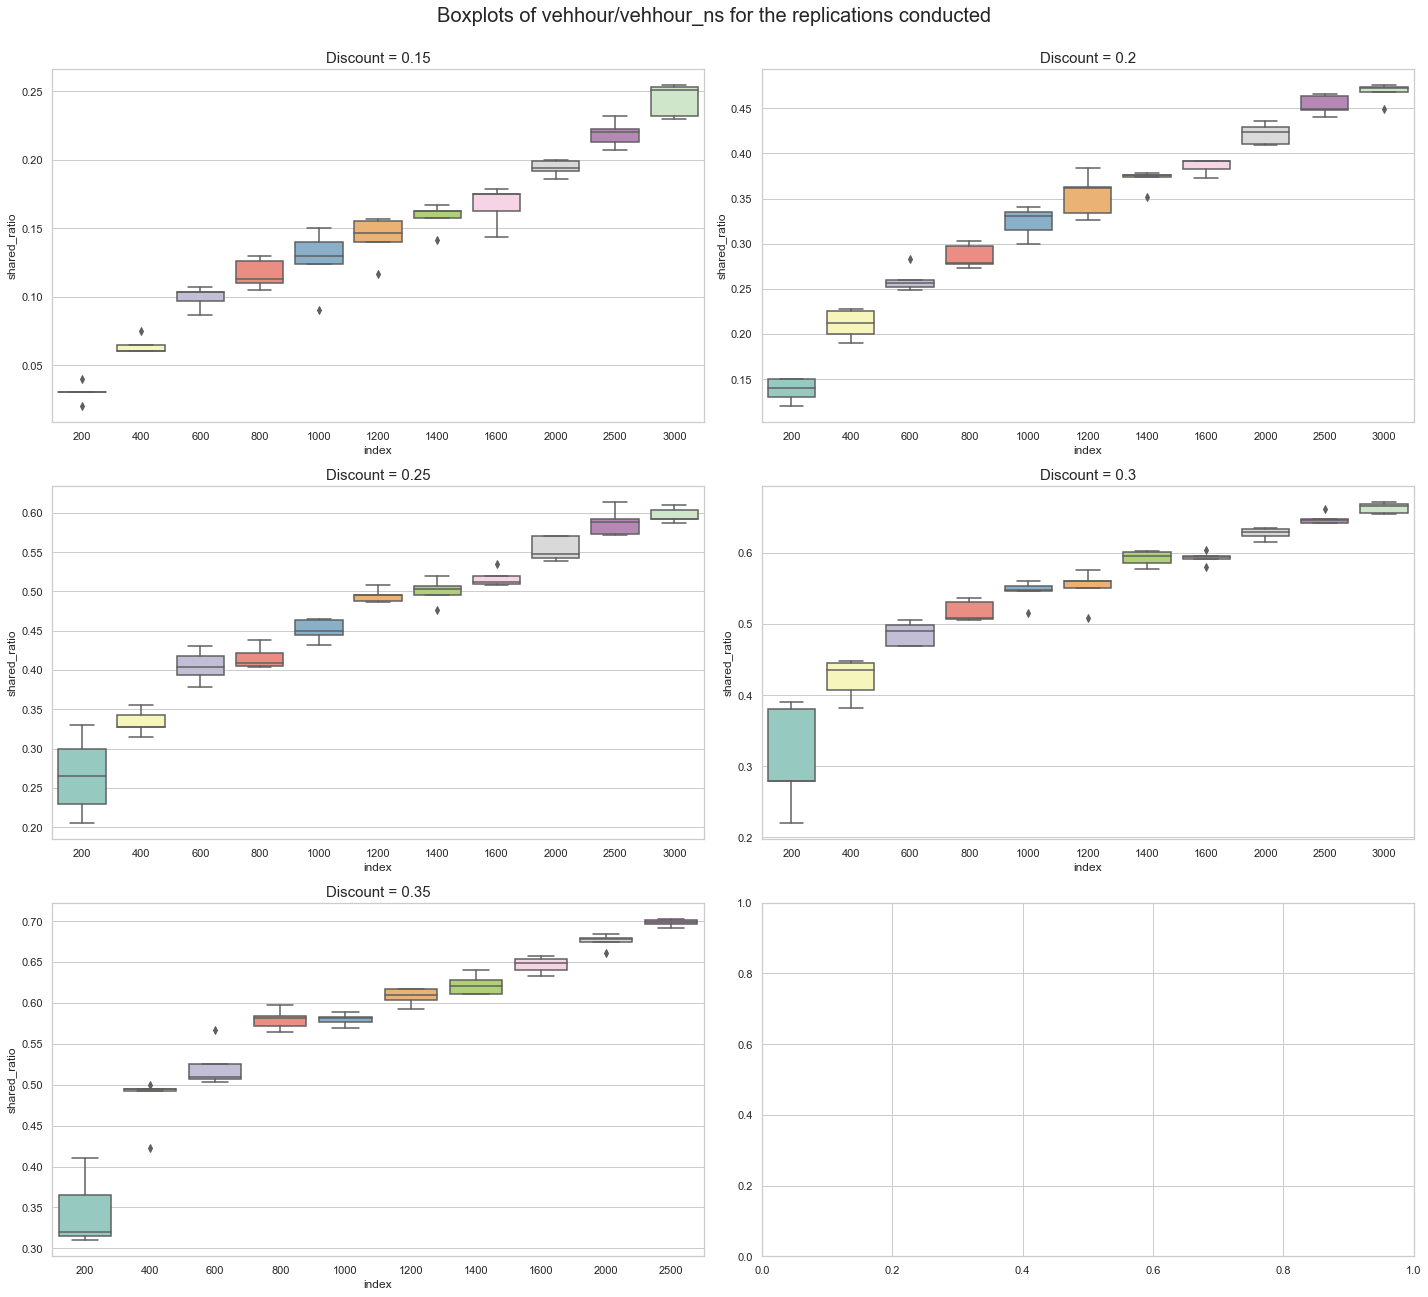

In [27]:
prices = [df_015, df_02,df_025,df_03,df_035]
price  = [0.15,0.2,0.25,0.3,0.35]

fig, axes = plt.subplots(3, 2, figsize = (20,18 ))
l=0
for i,k in enumerate(prices):
    l, j = divmod(i, 2)
    
    sns.boxplot(x='index', y='shared_ratio',data=k, palette="Set3",orient='v',ax=axes[l,j])\
    .set_title('Discount = {}'.format(price[i]),fontsize=15)
    ax.set_axis_off();
label = str('Boxplots of vehhour/vehhour_ns for the replications conducted')
fig.suptitle(label,y=1,fontsize=20)
fig.subplots_adjust(top=0.88)
plt.tight_layout()
plt.show()